<a href="https://colab.research.google.com/github/Alankarnagar/nagarmay31/blob/master/chapter_appendix-tools-for-deep-learning/Stock%20market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)


In [6]:
# Install dependencies
#!pip install yfinance pandas openpyxl requests beautifulsoup4 lxml tqdm

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import time

# Load Nifty 500 company list
url = "https://archives.nseindia.com/content/indices/ind_nifty500list.csv"
nifty500 = pd.read_csv(url)
nifty500["Symbol"] = nifty500["Symbol"].str.strip()

# Function to fetch sector PE & PEG from Screener.in (if available)
def get_sector_pe_peg(symbol):
    try:
        url = f"https://www.screener.in/company/{symbol}/"
        r = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}, timeout=10)
        soup = BeautifulSoup(r.text, "lxml")
        pe, peg = None, None
        for row in soup.select("li.flex.flex-space-between"):
            text = row.get_text(strip=True)
            if text.startswith("P/E:"):
                pe = text.split(":")[-1].strip()
            if text.startswith("PEG Ratio:"):
                peg = text.split(":")[-1].strip()
        return pe, peg
    except:
        return None, None

# Function to fetch company details
def fetch_company_data(symbol, index_label):
    try:
        ticker = yf.Ticker(symbol + ".NS")
        info = ticker.info

        data = {
            "Symbol": symbol,
            "Company PE (TTM)": info.get("trailingPE", None),
            "Company PEG": info.get("pegRatio", None),
            "Sector": info.get("sector", None),
            "Industry": info.get("industry", None),
            "Market Cap": info.get("marketCap", None),
            "Last Close": ticker.history(period="5d")["Close"].iloc[-1] if not ticker.history(period="5d").empty else None,
            "52W High": info.get("fiftyTwoWeekHigh", None),
            "52W Low": info.get("fiftyTwoWeekLow", None),
            "Index": index_label,
            "Sector PE (Benchmark)": None,
            "Sector PEG (Benchmark)": None
        }

        # Sector PE/PEG benchmark
        sector_pe, sector_peg = get_sector_pe_peg(symbol)
        data["Sector PE (Benchmark)"] = sector_pe
        data["Sector PEG (Benchmark)"] = sector_peg

        return data
    except Exception as e:
        return {"Symbol": symbol, "Error": str(e)}

# Loop through all Nifty 500 stocks
results = []
for _, row in tqdm(nifty500.iterrows(), total=len(nifty500)):
    data = fetch_company_data(row["Symbol"], "NIFTY 500")
    results.append(data)
    time.sleep(1)  # avoid request throttling

# Convert to DataFrame
df = pd.DataFrame(results)

# Save to Excel
excel_file = "Nifty500_Fundamentals.xlsx"
df.to_excel(excel_file, index=False)

df.head(15)


 29%|██▊       | 143/501 [05:45<14:18,  2.40s/it]ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:$DUMMYDBRLT.NS: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")
100%|██████████| 501/501 [20:06<00:00,  2.41s/it]


,Symbol,Company PE (TTM),Company PEG,Sector,Industry,Market Cap,Last Close,52W High,52W Low,Index,Sector PE (Benchmark),Sector PEG (Benchmark)
0,360ONE,41.293850,None,Financial Services,Asset Management,4.428970e+11,1094.699951,1318.00,790.50,NIFTY 500,None,None
1,3MINDIA,69.671750,None,Industrials,Conglomerates,3.456554e+11,30650.000000,37133.75,25718.15,NIFTY 500,None,None
2,ABB,60.010582,None,Industrials,Specialty Industrial Machinery,1.081684e+12,5104.500000,8940.60,4684.45,NIFTY 500,None,None
3,ACC,14.102344,None,Basic Materials,Building Materials,3.400072e+11,1810.599976,2544.90,1778.45,NIFTY 500,None,None
4,ACMESOLAR,48.351826,None,Utilities,Utilities - Renewable,1.846124e+11,305.100006,309.85,167.75,NIFTY 500,None,None
5,AIAENG,26.190878,None,Industrials,Specialty Industrial Machinery,2.893866e+11,3101.000000,4498.00,3025.00,NIFTY 500,None,None
6,APLAPOLLO,56.979560,None,Basic Materials,Steel,4.567112e+11,1645.000000,1936.00,1272.70,NIFTY 500,None,None
7,AUBANK,25.571478,None,Financial Services,Banks - Regional,5.587477e+11,749.500000,841.00,489.45,NIFTY 500,None,None
8,AWL,29.159143,None,Consumer Defensive,Packaged Foods,3.346356e+11,258.350006,385.50,231.55,NIFTY 500,None,None
9,AADHARHFC,24.018560,None,Financial Services,Mortgage Finance,2.236337e+11,517.599976,537.50,346.05,NIFTY 500,None,None


In [11]:
df_clean = df.dropna(subset=["Company PE (TTM)", "Market Cap", "Sector"])

# Calculate sector PE = Σ(Company PE × Market Cap) / Σ(Market Cap)
sector_pe = (
    df_clean.groupby("Sector")
    .apply(lambda g: (g["Company PE (TTM)"] * g["Market Cap"]).sum() / g["Market Cap"].sum())
    .reset_index()
    .rename(columns={0: "Sector PE (Weighted)"})
)

# Merge back into original DataFrame
dfnew = df.merge(sector_pe, on="Sector", how="left")

/tmp/ipython-input-34179776.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (g["Company PE (TTM)"] * g["Market Cap"]).sum() / g["Market Cap"].sum())


In [23]:
df = df.drop(columns=["Sector PE", "Sector PEG","Sector PE (Benchmark)","Sector PEG (Benchmark)","Sector PE (Weighted)_y"], errors="ignore")
df = df.rename(columns={
    "Sector PE (Weighted)_y": "Sector PE (Weighted)",
    "Sector PE (Weighted)_x": "Sector PE (Weighted)",
    "Sector PEG (Weighted)_y": "Sector PEG (Weighted)",
    "Sector PEG (Weighted)_x": "Sector PEG (Weighted)"
})

/tmp/ipython-input-136771769.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["Company PE (TTM)"] * x["Market Cap"]).sum() / x["Market Cap"].sum())


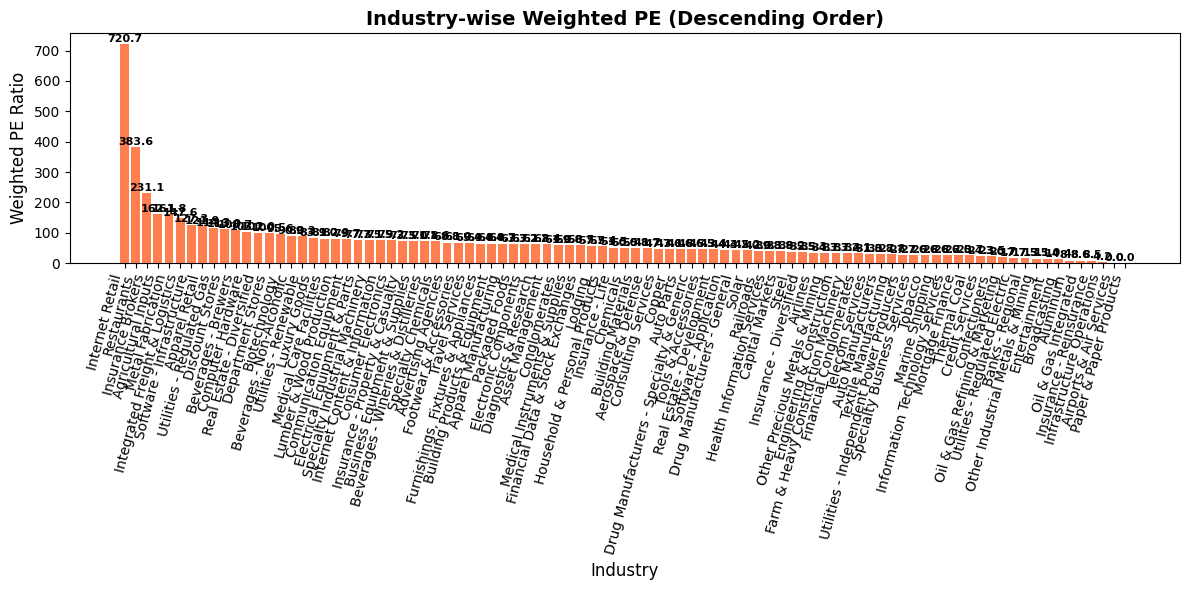

In [33]:
import pandas as pd

# Calculate weighted PE per Industry
industry_pe = (
    df.groupby("Industry")
    .apply(lambda x: (x["Company PE (TTM)"] * x["Market Cap"]).sum() / x["Market Cap"].sum())
    .reset_index(name="Industry PE (Weighted)")
)

# Merge back into df so each company row has its industry's weighted PE
df = df.merge(industry_pe, on="Industry", how="left")

# Sort industries by weighted PE (descending)
industry_pe_sorted = industry_pe.sort_values(by="Industry PE (Weighted)", ascending=False)

# Plot industry-wise weighted PE
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.bar(industry_pe_sorted["Industry"], industry_pe_sorted["Industry PE (Weighted)"], color="coral")

plt.title("Industry-wise Weighted PE (Descending Order)", fontsize=14, fontweight="bold")
plt.ylabel("Weighted PE Ratio", fontsize=12)
plt.xlabel("Industry", fontsize=12)
plt.xticks(rotation=75, ha="right")

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5,
             f"{yval:.1f}", ha="center", va="bottom", fontsize=8, fontweight="bold")

plt.tight_layout()
plt.show()


In [34]:
# Sort by Market Cap (descending)
df = df.sort_values(by="Market Cap", ascending=False).reset_index(drop=True)

# Save sorted file
excel_file = "Nifty500_Fundamentals_Sorted.xlsx"
df.to_excel(excel_file, index=False)

# Quick preview
df.head(10)

,Symbol,Company PE (TTM),Company PEG,Sector,Industry,Market Cap,Last Close,52W High,52W Low,Index,Sector PE (Weighted),Industry PE (Weighted)
0,RELIANCE,23.458534,None,Energy,Oil & Gas Refining & Marketing,1.910112e+13,1411.500000,1551.00,1114.85,NIFTY 500,20.364073,20.734216
1,HDFCBANK,22.468542,None,Financial Services,Banks - Regional,1.507920e+13,1964.199951,2037.70,1613.00,NIFTY 500,29.555320,17.255796
2,BHARTIARTL,32.753940,None,Communication Services,Telecom Services,1.158232e+13,1931.500000,2045.80,1502.00,NIFTY 500,36.690291,31.341014
3,TCS,23.053373,None,Technology,Information Technology Services,1.136116e+13,3140.100098,4592.25,2991.60,NIFTY 500,35.716981,26.170569
4,ICICIBANK,19.484634,None,Financial Services,Banks - Regional,1.023071e+13,1432.900024,1500.00,1186.00,NIFTY 500,29.555320,17.255796
5,SBIN,9.167321,None,Financial Services,Banks - Regional,7.535416e+12,816.349976,875.45,680.00,NIFTY 500,29.555320,17.255796
6,INFY,22.874214,None,Technology,Information Technology Services,6.347237e+12,1531.199951,2006.45,1307.00,NIFTY 500,35.716981,26.170569
7,HINDUNILVR,57.166450,None,Consumer Defensive,Household & Personal Products,6.181302e+12,2630.800049,3035.00,2136.00,NIFTY 500,62.039516,57.381332
8,LICI,11.589257,None,Financial Services,Insurance - Life,5.653615e+12,893.299988,1095.00,715.30,NIFTY 500,29.555320,51.481413
9,BAJFINANCE,32.061230,None,Financial Services,Credit Services,5.595814e+12,900.599976,978.80,645.10,NIFTY 500,29.555320,24.332254


In [35]:
from google.colab import files
files.download("Nifty500_Fundamentals_Sorted.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

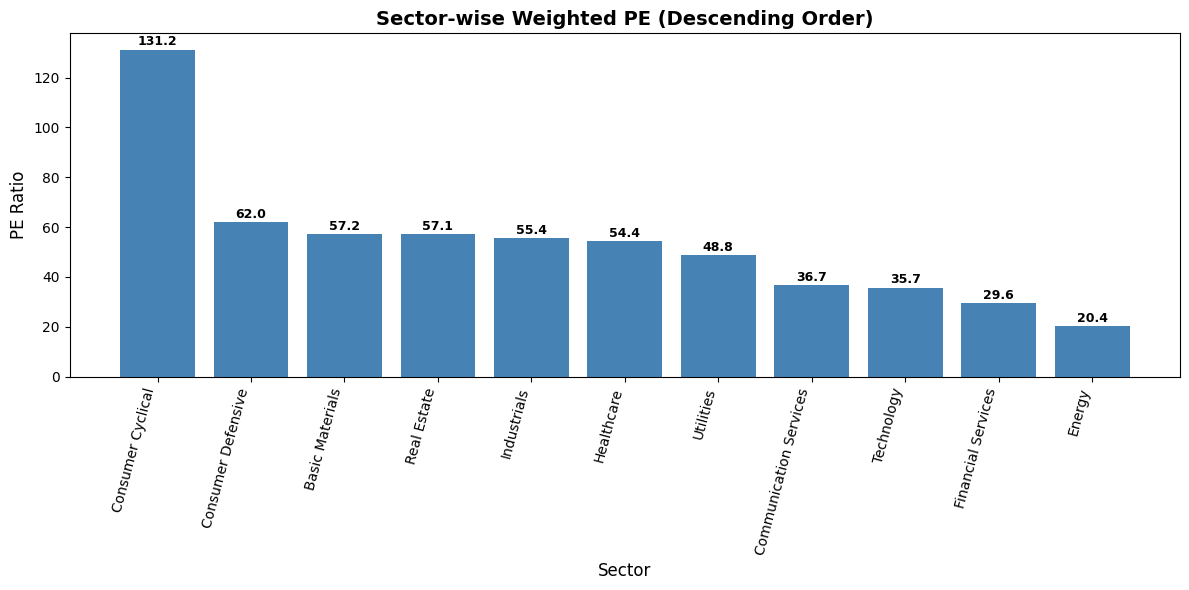

In [28]:
import matplotlib.pyplot as plt

# Group sector PE (weighted) - take unique value per sector
sector_pe_plot = df.groupby("Sector")["Sector PE (Weighted)"].first().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(sector_pe_plot.index, sector_pe_plot.values, color="steelblue")


plt.title("Sector-wise Weighted PE (Descending Order)", fontsize=14, fontweight="bold")
plt.ylabel("PE Ratio", fontsize=12)
plt.xlabel("Sector", fontsize=12)
plt.xticks(rotation=75, ha="right")

# Add data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5,
             f"{yval:.1f}", ha="center", va="bottom", fontsize=9, fontweight="bold")


plt.tight_layout()
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd

symbol = "RELIANCE.NS"
ticker = yf.Ticker(symbol)

# Quarterly Financials (Revenue available here)
q_fin = ticker.quarterly_financials

if q_fin is not None and not q_fin.empty:
    revenue = q_fin.loc["Total Revenue"].tail(5)  # last 5 quarters
    df_revenue = revenue.reset_index()
    df_revenue.columns = ["Quarter", "Revenue"]

    # Compute revenue growth %
    df_revenue["Revenue Growth %"] = df_revenue["Revenue"].pct_change() * 100
else:
    df_revenue = pd.DataFrame()
    print(f"No revenue data for {symbol}")

# Quarterly EPS (Yahoo sometimes has this separately)
q_earn = ticker.quarterly_earnings
if q_earn is not None and not q_earn.empty:
    df_eps = q_earn.tail(5).reset_index()
    df_eps["EPS Growth %"] = df_eps["Earnings"].pct_change() * 100
else:
    df_eps = pd.DataFrame()
    print(f"No EPS data for {symbol}")

print("Revenue Data:\n", df_revenue)
print("\nEPS Data:\n", df_eps)


In [37]:
import yfinance as yf
import pandas as pd

def get_quarterly_data(symbol):
    """
    Fetch last 5 quarters of Revenue and EPS data with growth % for a given ticker.
    Returns a DataFrame with columns: Quarter, Revenue, Revenue Growth %, EPS, EPS Growth %
    """
    ticker = yf.Ticker(symbol)

    # ---------- Revenue ----------
    q_fin = ticker.quarterly_financials
    df_rev = pd.DataFrame()

    if q_fin is not None and not q_fin.empty:
        if "Total Revenue" in q_fin.index:
            revenue = q_fin.loc["Total Revenue"].tail(5)
            df_rev = revenue.reset_index()
            df_rev.columns = ["Quarter", "Revenue"]
            df_rev["Revenue Growth %"] = df_rev["Revenue"].pct_change() * 100

    # ---------- EPS ----------
    q_earn = ticker.quarterly_earnings
    df_eps = pd.DataFrame()

    if q_earn is not None and not q_earn.empty:
        df_eps = q_earn.tail(5).reset_index()
        df_eps.rename(columns={"Earnings": "EPS", "Quarter": "Quarter"}, inplace=True)
        df_eps["EPS Growth %"] = df_eps["EPS"].pct_change() * 100

    # ---------- Merge ----------
    if not df_rev.empty and not df_eps.empty:
        df = pd.merge(df_rev, df_eps[["Quarter", "EPS", "EPS Growth %"]], on="Quarter", how="outer")
    elif not df_rev.empty:
        df = df_rev
    elif not df_eps.empty:
        df = df_eps
    else:
        df = pd.DataFrame(columns=["Quarter", "Revenue", "Revenue Growth %", "EPS", "EPS Growth %"])

    return df


# ---------- Example Test ----------
df_reliance = get_quarterly_data("RELIANCE.NS")
print(df_reliance)


     Quarter       Revenue  Revenue Growth %
0 2024-12-31  2.399860e+12               NaN
1 2024-09-30  2.315350e+12         -3.521455
2 2024-06-30  2.317840e+12          0.107543
3 2024-03-31           NaN          0.000000
4 2023-12-31           NaN          0.000000


/tmp/ipython-input-3956263881.py:20: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_rev["Revenue Growth %"] = df_rev["Revenue"].pct_change() * 100
/usr/local/lib/python3.12/dist-packages/yfinance/scrapers/fundamentals.py:36: DeprecationWarning: 'Ticker.earnings' is deprecated as not available via API. Look for "Net Income" in Ticker.income_stmt.
  warnings.warn("'Ticker.earnings' is deprecated as not available via API. Look for \"Net Income\" in Ticker.income_stmt.", DeprecationWarning)


In [38]:
import yfinance as yf
import pandas as pd

# ----------------- STEP 1: Master Table (PE, Market Cap, Sector, Industry, Index) -----------------
def get_master_data(symbols):
    rows = []
    for sym, name in symbols.items():
        try:
            ticker = yf.Ticker(sym)
            info = ticker.info

            rows.append({
                "Company": name,
                "Symbol": sym,
                "PE": info.get("trailingPE"),
                "PEG": info.get("pegRatio"),
                "Sector": info.get("sector"),
                "Industry": info.get("industry"),
                "Market Cap": info.get("marketCap"),
                "Last Close": info.get("previousClose"),
                "52W High": info.get("fiftyTwoWeekHigh"),
                "52W Low": info.get("fiftyTwoWeekLow"),
                "Index": "NIFTY 500"  # placeholder (can be improved with NSE mapping)
            })
        except Exception as e:
            print(f"Failed for {sym}: {e}")
    return pd.DataFrame(rows)


# ----------------- STEP 2: Financials Function (Revenue & Net Income, Growth) -----------------
def get_quarterly_data_row(symbol, name=None):
    ticker = yf.Ticker(symbol)
    q_fin = ticker.quarterly_financials

    if q_fin is None or q_fin.empty:
        return pd.DataFrame()

    data = {"Company": name if name else symbol}

    # Revenue
    if "Total Revenue" in q_fin.index:
        rev = q_fin.loc["Total Revenue"].tail(5).values
        for i, val in enumerate(rev, 1):
            data[f"Revenue_Q{i}"] = val
        for i in range(1, len(rev)):
            if rev[i-1] != 0:
                data[f"RevenueGrowth_Q{i+1}"] = (rev[i] - rev[i-1]) / rev[i-1] * 100
            else:
                data[f"RevenueGrowth_Q{i+1}"] = None

    # Net Income (Earnings After Tax)
    if "Net Income" in q_fin.index:
        ni = q_fin.loc["Net Income"].tail(5).values
        for i, val in enumerate(ni, 1):
            data[f"NetIncome_Q{i}"] = val
        for i in range(1, len(ni)):
            if ni[i-1] != 0:
                data[f"NetIncomeGrowth_Q{i+1}"] = (ni[i] - ni[i-1]) / ni[i-1] * 100
            else:
                data[f"NetIncomeGrowth_Q{i+1}"] = None

    return pd.DataFrame([data])


# ----------------- STEP 3: Combine Master Table + Financials -----------------
def build_master_with_financials(symbols):
    # Base table (PE, PEG, Market Cap, etc.)
    master_df = get_master_data(symbols)

    # Collect financials for each company
    fin_list = []
    for sym, name in symbols.items():
        fin_df = get_quarterly_data_row(sym, name)
        if not fin_df.empty:
            fin_list.append(fin_df)

    fin_df_all = pd.concat(fin_list, ignore_index=True)

    # Merge on "Company"
    final_df = pd.merge(master_df, fin_df_all, on="Company", how="left")

    return final_df


# ----------------- STEP 4: Run Example -----------------
symbols = {
    "RELIANCE.NS": "Reliance Industries",
    "TCS.NS": "TCS",
    "INFY.NS": "Infosys"
}

df_final = build_master_with_financials(symbols)

# Save to Excel
df_final.to_excel("NIFTY500_Master_Financials.xlsx", index=False)

print(df_final.head())


               Company       Symbol         PE   PEG      Sector  \
0  Reliance Industries  RELIANCE.NS  23.476816  None      Energy   
1                  TCS       TCS.NS  23.057043  None  Technology   
2              Infosys      INFY.NS  22.887660  None  Technology   

                          Industry      Market Cap  Last Close  52W High  \
0   Oil & Gas Refining & Marketing  19116008144896      1409.2   1551.00   
1  Information Technology Services  11362973515776      3054.0   4592.25   
2  Information Technology Services   6350967930880      1487.5   2006.45   

   52W Low  ... RevenueGrowth_Q5  NetIncome_Q1  NetIncome_Q2  NetIncome_Q3  \
0  1114.85  ...              NaN  1.854000e+11  1.656300e+11  1.513800e+11   
1  2991.60  ...              NaN  1.238000e+11  1.190900e+11  1.204000e+11   
2  1307.00  ...              NaN  8.040000e+08  7.770000e+08  7.630000e+08   

   NetIncome_Q4  NetIncome_Q5  NetIncomeGrowth_Q2  NetIncomeGrowth_Q3  \
0           NaN           NaN       

In [39]:
import numpy as np
import pandas as pd

# --- helper: weighted average (ignores NaNs, non-positive caps/PEs) ---
def wavg(group, value_col="PE", weight_col="Market Cap"):
    sub = group[[value_col, weight_col]].dropna()
    sub = sub[(sub[weight_col] > 0) & (sub[value_col] > 0)]
    if sub.empty:
        return np.nan
    return np.average(sub[value_col], weights=sub[weight_col])

# --- Sector-wise weighted PE ---
sector_pe = (
    df_final.groupby("Sector")
            .apply(lambda g: wavg(g, value_col="PE", weight_col="Market Cap"))
            .reset_index(name="Sector PE (Weighted)")
)

# --- Industry-wise weighted PE ---
industry_pe = (
    df_final.groupby("Industry")
            .apply(lambda g: wavg(g, value_col="PE", weight_col="Market Cap"))
            .reset_index(name="Industry PE (Weighted)")
)

# --- Merge back to each company row ---
df_final = df_final.merge(sector_pe, on="Sector", how="left")
df_final = df_final.merge(industry_pe, on="Industry", how="left")

# (optional) sort by market cap for readability
df_final = df_final.sort_values("Market Cap", ascending=False).reset_index(drop=True)

# --- Save with summary sheets ---
with pd.ExcelWriter("NIFTY500_Master_Financials.xlsx", engine="openpyxl") as writer:
    df_final.to_excel(writer, sheet_name="Companies", index=False)
    sector_pe.sort_values("Sector PE (Weighted)", ascending=False).to_excel(writer, sheet_name="Sector PE", index=False)
    industry_pe.sort_values("Industry PE (Weighted)", ascending=False).to_excel(writer, sheet_name="Industry PE", index=False)

print("✅ Added sector & industry weighted PE and saved to NIFTY500_Master_Financials.xlsx")


✅ Added sector & industry weighted PE and saved to NIFTY500_Master_Financials.xlsx


/tmp/ipython-input-160715557.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: wavg(g, value_col="PE", weight_col="Market Cap"))
/tmp/ipython-input-160715557.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: wavg(g, value_col="PE", weight_col="Market Cap"))


In [41]:
from google.colab import files
files.download("NIFTY500_Master_Financials.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
import pandas as pd
import numpy as np
import yfinance as yf
import time

# ---------------- Weighted Average Function ----------------
def wavg(group, value_col="Company PE", weight_col="Market Cap"):
    sub = group[[value_col, weight_col]].dropna()
    sub = sub[(sub[weight_col] > 0) & (sub[value_col] > 0)]
    if sub.empty:
        return np.nan
    return np.average(sub[value_col], weights=sub[weight_col])


# ---------------- Fetch Company Data ----------------
def fetch_company_data(symbol):
    try:
        ticker = yf.Ticker(symbol + ".NS")
        info = ticker.info
        financials = ticker.quarterly_financials.T  # rows = quarters
        financials.index = pd.to_datetime(financials.index)

        # Extract last 6 quarters to compute 5 growth points
        rev = financials["Total Revenue"].head(6) if "Total Revenue" in financials.columns else None
        eat = financials["Net Income"].head(6) if "Net Income" in financials.columns else None

        # Calculate growth (% change QoQ)
        rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
        eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []

        # Base data
        data = {
            "Symbol": symbol,
            "Company PE": info.get("trailingPE"),
            "PEG Ratio": info.get("pegRatio"),
            "Market Cap": info.get("marketCap"),
            "Last Close": info.get("previousClose"),
            "52W High": info.get("fiftyTwoWeekHigh"),
            "52W Low": info.get("fiftyTwoWeekLow"),
            "Sector": info.get("sector"),
            "Industry": info.get("industry"),
        }

        # Add revenue growth columns
        for i, val in enumerate(rev_growth, start=1):
            data[f"Revenue Growth_Q{i}"] = val

        # Add earnings growth columns
        for i, val in enumerate(eat_growth, start=1):
            data[f"EAT Growth_Q{i}"] = val

        return data

    except Exception as e:
        return {"Symbol": symbol, "Error": str(e)}


# ---------------- Load Nifty 500 Stock List ----------------
url = "https://archives.nseindia.com/content/indices/ind_nifty500list.csv"
nifty500_list = pd.read_csv(url)
symbols = nifty500_list["Symbol"].tolist()


# ---------------- Fetch Data for All Companies ----------------
company_data = []
for i, sym in enumerate(symbols):
    print(f"Fetching {i+1}/{len(symbols)}: {sym}")
    company_data.append(fetch_company_data(sym))
    time.sleep(1.2)  # avoid rate limiting

df_companies = pd.DataFrame(company_data)


# ---------------- Calculate Weighted PE ----------------
sector_pe = (
    df_companies.groupby("Sector")
    .apply(lambda g: wavg(g, "Company PE", "Market Cap"))
    .reset_index(name="Sector PE (Weighted)")
)

industry_pe = (
    df_companies.groupby("Industry")
    .apply(lambda g: wavg(g, "Company PE", "Market Cap"))
    .reset_index(name="Industry PE (Weighted)")
)


# ---------------- Merge ----------------
df_final = df_companies.merge(sector_pe, on="Sector", how="left")
df_final = df_final.merge(industry_pe, on="Industry", how="left")

# Reorder columns
cols_order = [
    "Symbol", "Sector", "Industry", "Market Cap",
    "Company PE", "Sector PE (Weighted)", "Industry PE (Weighted)",
    "PEG Ratio", "Last Close", "52W High", "52W Low"
]
growth_cols = [c for c in df_final.columns if "Growth" in c]
df_final = df_final[cols_order + growth_cols]

# Sort by market cap
df_final = df_final.sort_values("Market Cap", ascending=False).reset_index(drop=True)


# ---------------- Export ----------------
df_final.to_excel("nifty500_fundamentals.xlsx", index=False)
df_final.to_csv("nifty500_fundamentals.csv", index=False)

print("✅ Data extraction complete! File saved as nifty500_fundamentals.xlsx and .csv")


Fetching 1/501: 360ONE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 2/501: 3MINDIA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 3/501: ABB


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 4/501: ACC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 5/501: ACMESOLAR


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 6/501: AIAENG


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 7/501: APLAPOLLO


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 8/501: AUBANK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 9/501: AWL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 10/501: AADHARHFC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 11/501: AARTIIND


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 12/501: AAVAS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 13/501: ABBOTINDIA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 14/501: ACE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 15/501: ADANIENSOL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 16/501: ADANIENT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 17/501: ADANIGREEN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 18/501: ADANIPORTS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 19/501: ADANIPOWER


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 20/501: ATGL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 21/501: ABCAPITAL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 22/501: ABFRL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 23/501: ABREL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 24/501: ABSLAMC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 25/501: AEGISLOG


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 26/501: AFCONS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 27/501: AFFLE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 28/501: AJANTPHARM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 29/501: AKUMS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 30/501: APLLTD


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 31/501: ALIVUS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 32/501: ALKEM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 33/501: ALKYLAMINE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 34/501: ALOKINDS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 35/501: ARE&M


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 36/501: AMBER


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 37/501: AMBUJACEM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 38/501: ANANDRATHI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 39/501: ANANTRAJ


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 40/501: ANGELONE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 41/501: APARINDS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 42/501: APOLLOHOSP


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 43/501: APOLLOTYRE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 44/501: APTUS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 45/501: ASAHIINDIA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 46/501: ASHOKLEY


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 47/501: ASIANPAINT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 48/501: ASTERDM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 49/501: ASTRAZEN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 50/501: ASTRAL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 51/501: ATUL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 52/501: AUROPHARMA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 53/501: AIIL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 54/501: DMART


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 55/501: AXISBANK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 56/501: BASF


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 57/501: BEML


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 58/501: BLS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 59/501: BSE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 60/501: BAJAJ-AUTO


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 61/501: BAJFINANCE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 62/501: BAJAJFINSV


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 63/501: BAJAJHLDNG


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 64/501: BAJAJHFL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 65/501: BALKRISIND


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 66/501: BALRAMCHIN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 67/501: BANDHANBNK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 68/501: BANKBARODA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 69/501: BANKINDIA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 70/501: MAHABANK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 71/501: BATAINDIA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 72/501: BAYERCROP


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 73/501: BERGEPAINT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 74/501: BDL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 75/501: BEL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 76/501: BHARATFORG


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 77/501: BHEL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 78/501: BPCL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 79/501: BHARTIARTL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 80/501: BHARTIHEXA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 81/501: BIKAJI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 82/501: BIOCON


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 83/501: BSOFT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 84/501: BLUEDART


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 85/501: BLUESTARCO


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 86/501: BBTC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 87/501: BOSCHLTD


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 88/501: FIRSTCRY


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 89/501: BRIGADE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 90/501: BRITANNIA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 91/501: MAPMYINDIA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 92/501: CCL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 93/501: CESC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 94/501: CGPOWER


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 95/501: CRISIL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 96/501: CAMPUS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 97/501: CANFINHOME


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 98/501: CANBK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 99/501: CAPLIPOINT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 100/501: CGCL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 101/501: CARBORUNIV


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 102/501: CASTROLIND


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 103/501: CEATLTD


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 104/501: CENTRALBK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 105/501: CDSL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 106/501: CENTURYPLY


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 107/501: CERA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 108/501: CHALET


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 109/501: CHAMBLFERT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 110/501: CHENNPETRO


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 111/501: CHOLAHLDNG


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 112/501: CHOLAFIN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 113/501: CIPLA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 114/501: CUB


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 115/501: CLEAN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 116/501: COALINDIA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 117/501: COCHINSHIP


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 118/501: COFORGE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 119/501: COHANCE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 120/501: COLPAL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 121/501: CAMS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 122/501: CONCORDBIO


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 123/501: CONCOR


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 124/501: COROMANDEL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 125/501: CRAFTSMAN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 126/501: CREDITACC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 127/501: CROMPTON


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 128/501: CUMMINSIND


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 129/501: CYIENT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 130/501: DCMSHRIRAM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 131/501: DLF


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 132/501: DOMS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 133/501: DABUR


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 134/501: DALBHARAT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 135/501: DATAPATTNS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 136/501: DEEPAKFERT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 137/501: DEEPAKNTR


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 138/501: DELHIVERY


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 139/501: DEVYANI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 140/501: DIVISLAB


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 141/501: DIXON


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 142/501: LALPATHLAB


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 143/501: DRREDDY


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 144/501: DUMMYDBRLT


ERROR:yfinance:HTTP Error 404: 


Fetching 145/501: EIDPARRY


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 146/501: EIHOTEL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 147/501: EICHERMOT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 148/501: ELECON


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 149/501: ELGIEQUIP


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 150/501: EMAMILTD


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 151/501: EMCURE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 152/501: ENDURANCE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 153/501: ENGINERSIN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 154/501: ERIS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 155/501: ESCORTS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 156/501: ETERNAL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 157/501: EXIDEIND


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 158/501: NYKAA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 159/501: FEDERALBNK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 160/501: FACT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 161/501: FINCABLES


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 162/501: FINPIPE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 163/501: FSL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 164/501: FIVESTAR


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 165/501: FORTIS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 166/501: GAIL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 167/501: GVT&D


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 168/501: GMRAIRPORT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 169/501: GRSE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 170/501: GICRE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 171/501: GILLETTE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 172/501: GLAND


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 173/501: GLAXO


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 174/501: GLENMARK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 175/501: MEDANTA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 176/501: GODIGIT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 177/501: GPIL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 178/501: GODFRYPHLP


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 179/501: GODREJAGRO


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 180/501: GODREJCP


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 181/501: GODREJIND


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 182/501: GODREJPROP


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 183/501: GRANULES


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 184/501: GRAPHITE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 185/501: GRASIM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 186/501: GRAVITA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 187/501: GESHIP


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 188/501: FLUOROCHEM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 189/501: GUJGASLTD


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 190/501: GMDCLTD


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 191/501: GNFC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 192/501: GPPL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 193/501: GSPL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 194/501: HEG


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 195/501: HBLENGINE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 196/501: HCLTECH


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 197/501: HDFCAMC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 198/501: HDFCBANK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 199/501: HDFCLIFE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 200/501: HFCL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 201/501: HAPPSTMNDS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 202/501: HAVELLS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 203/501: HEROMOTOCO


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 204/501: HSCL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 205/501: HINDALCO


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 206/501: HAL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 207/501: HINDCOPPER


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 208/501: HINDPETRO


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 209/501: HINDUNILVR


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 210/501: HINDZINC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 211/501: POWERINDIA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 212/501: HOMEFIRST


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 213/501: HONASA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 214/501: HONAUT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 215/501: HUDCO


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 216/501: HYUNDAI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 217/501: ICICIBANK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 218/501: ICICIGI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 219/501: ICICIPRULI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 220/501: IDBI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 221/501: IDFCFIRSTB


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 222/501: IFCI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 223/501: IIFL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 224/501: INOXINDIA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 225/501: IRB


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 226/501: IRCON


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 227/501: ITC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 228/501: ITI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 229/501: INDGN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 230/501: INDIACEM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 231/501: INDIAMART


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 232/501: INDIANB


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 233/501: IEX


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 234/501: INDHOTEL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 235/501: IOC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 236/501: IOB


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 237/501: IRCTC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 238/501: IRFC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 239/501: IREDA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 240/501: IGL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 241/501: INDUSTOWER


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 242/501: INDUSINDBK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 243/501: NAUKRI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 244/501: INFY


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 245/501: INOXWIND


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 246/501: INTELLECT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 247/501: INDIGO


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 248/501: IGIL
Fetching 249/501: IKS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 250/501: IPCALAB


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 251/501: JBCHEPHARM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 252/501: JKCEMENT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 253/501: JBMA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 254/501: JKTYRE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 255/501: JMFINANCIL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 256/501: JSWENERGY


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 257/501: JSWHL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 258/501: JSWINFRA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 259/501: JSWSTEEL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 260/501: JPPOWER


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 261/501: J&KBANK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 262/501: JINDALSAW


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 263/501: JSL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 264/501: JINDALSTEL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 265/501: JIOFIN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 266/501: JUBLFOOD


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 267/501: JUBLINGREA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 268/501: JUBLPHARMA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 269/501: JWL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 270/501: JUSTDIAL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 271/501: JYOTHYLAB


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 272/501: JYOTICNC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 273/501: KPRMILL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 274/501: KEI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 275/501: KNRCON


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 276/501: KPITTECH


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 277/501: KAJARIACER


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 278/501: KPIL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 279/501: KALYANKJIL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 280/501: KANSAINER


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 281/501: KARURVYSYA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 282/501: KAYNES


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 283/501: KEC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 284/501: KFINTECH


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 285/501: KIRLOSBROS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 286/501: KIRLOSENG


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 287/501: KOTAKBANK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 288/501: KIMS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 289/501: LTF


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 290/501: LTTS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 291/501: LICHSGFIN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 292/501: LTFOODS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 293/501: LTIM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 294/501: LT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 295/501: LATENTVIEW


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 296/501: LAURUSLABS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 297/501: LEMONTREE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 298/501: LICI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 299/501: LINDEINDIA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 300/501: LLOYDSME


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 301/501: LODHA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 302/501: LUPIN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 303/501: MMTC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 304/501: MRF


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 305/501: MGL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 306/501: MAHSEAMLES


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 307/501: M&MFIN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 308/501: M&M


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 309/501: MANAPPURAM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 310/501: MRPL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 311/501: MANKIND


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 312/501: MARICO


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 313/501: MARUTI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 314/501: MASTEK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 315/501: MFSL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 316/501: MAXHEALTH


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 317/501: MAZDOCK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 318/501: METROPOLIS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 319/501: MINDACORP


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 320/501: MSUMI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 321/501: MOTILALOFS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 322/501: MPHASIS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 323/501: MCX


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 324/501: MUTHOOTFIN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 325/501: NATCOPHARM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 326/501: NBCC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 327/501: NCC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 328/501: NHPC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 329/501: NLCINDIA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 330/501: NMDC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 331/501: NSLNISP


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 332/501: NTPCGREEN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 333/501: NTPC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 334/501: NH


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 335/501: NATIONALUM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 336/501: NAVA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 337/501: NAVINFLUOR


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 338/501: NESTLEIND


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 339/501: NETWEB


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 340/501: NETWORK18


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 341/501: NEULANDLAB


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 342/501: NEWGEN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 343/501: NAM-INDIA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 344/501: NIVABUPA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 345/501: NUVAMA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 346/501: OBEROIRLTY


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 347/501: ONGC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 348/501: OIL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 349/501: OLAELEC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 350/501: OLECTRA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 351/501: PAYTM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 352/501: OFSS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 353/501: POLICYBZR


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 354/501: PCBL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 355/501: PGEL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 356/501: PIIND


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 357/501: PNBHOUSING


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 358/501: PNCINFRA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 359/501: PTCIL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 360/501: PVRINOX


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 361/501: PAGEIND


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 362/501: PATANJALI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 363/501: PERSISTENT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 364/501: PETRONET


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 365/501: PFIZER


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 366/501: PHOENIXLTD


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 367/501: PIDILITIND


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 368/501: PEL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 369/501: PPLPHARMA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 370/501: POLYMED


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 371/501: POLYCAB


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 372/501: POONAWALLA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 373/501: PFC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 374/501: POWERGRID


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 375/501: PRAJIND


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 376/501: PREMIERENE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 377/501: PRESTIGE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 378/501: PNB


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 379/501: RRKABEL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 380/501: RBLBANK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 381/501: RECLTD


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 382/501: RHIM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 383/501: RITES


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 384/501: RADICO


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 385/501: RVNL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 386/501: RAILTEL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 387/501: RAINBOW


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 388/501: RKFORGE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 389/501: RCF


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 390/501: RTNINDIA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 391/501: RAYMONDLSL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 392/501: RAYMOND


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 393/501: REDINGTON


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 394/501: RELIANCE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 395/501: RPOWER


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 396/501: ROUTE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 397/501: SBFC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 398/501: SBICARD


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 399/501: SBILIFE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 400/501: SJVN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 401/501: SKFINDIA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 402/501: SRF


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 403/501: SAGILITY


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 404/501: SAILIFE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 405/501: SAMMAANCAP


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 406/501: MOTHERSON


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 407/501: SAPPHIRE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 408/501: SARDAEN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 409/501: SAREGAMA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 410/501: SCHAEFFLER


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 411/501: SCHNEIDER


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 412/501: SCI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 413/501: SHREECEM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 414/501: RENUKA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 415/501: SHRIRAMFIN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 416/501: SHYAMMETL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 417/501: SIEMENS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 418/501: SIGNATURE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 419/501: SOBHA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 420/501: SOLARINDS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 421/501: SONACOMS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 422/501: SONATSOFTW


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 423/501: STARHEALTH


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 424/501: SBIN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 425/501: SAIL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 426/501: SWSOLAR


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 427/501: SUMICHEM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 428/501: SUNPHARMA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 429/501: SUNTV


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 430/501: SUNDARMFIN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 431/501: SUNDRMFAST


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 432/501: SUPREMEIND


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 433/501: SUZLON


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 434/501: SWANENERGY


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 435/501: SWIGGY


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 436/501: SYNGENE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 437/501: SYRMA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 438/501: TBOTEK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 439/501: TVSMOTOR


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 440/501: TANLA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 441/501: TATACHEM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 442/501: TATACOMM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 443/501: TCS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 444/501: TATACONSUM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 445/501: TATAELXSI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 446/501: TATAINVEST


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 447/501: TATAMOTORS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 448/501: TATAPOWER


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 449/501: TATASTEEL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 450/501: TATATECH


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 451/501: TTML


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 452/501: TECHM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 453/501: TECHNOE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 454/501: TEJASNET


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 455/501: NIACL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 456/501: RAMCOCEM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 457/501: THERMAX


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 458/501: TIMKEN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 459/501: TITAGARH


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 460/501: TITAN


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 461/501: TORNTPHARM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 462/501: TORNTPOWER


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 463/501: TARIL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 464/501: TRENT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 465/501: TRIDENT


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 466/501: TRIVENI


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 467/501: TRITURBINE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 468/501: TIINDIA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 469/501: UCOBANK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 470/501: UNOMINDA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 471/501: UPL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 472/501: UTIAMC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 473/501: ULTRACEMCO


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 474/501: UNIONBANK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 475/501: UBL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 476/501: UNITDSPR


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 477/501: USHAMART


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 478/501: VGUARD


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 479/501: DBREALTY


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 480/501: VTL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 481/501: VBL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 482/501: MANYAVAR


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 483/501: VEDL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 484/501: VIJAYA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 485/501: VMM


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 486/501: IDEA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 487/501: VOLTAS


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 488/501: WAAREEENER


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 489/501: WELCORP


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 490/501: WELSPUNLIV


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 491/501: WESTLIFE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 492/501: WHIRLPOOL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 493/501: WIPRO


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 494/501: WOCKPHARMA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 495/501: YESBANK


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 496/501: ZFCVINDIA


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 497/501: ZEEL


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 498/501: ZENTEC


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 499/501: ZENSARTECH


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 500/501: ZYDUSLIFE


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []


Fetching 501/501: ECLERX


/tmp/ipython-input-2348412515.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rev_growth = rev.pct_change().dropna().round(3).tolist() if rev is not None else []
/tmp/ipython-input-2348412515.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eat_growth = eat.pct_change().dropna().round(3).tolist() if eat is not None else []
/tmp/ipython-input-2348412515.py:77: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False

✅ Data extraction complete! File saved as nifty500_fundamentals.xlsx and .csv


In [44]:
from google.colab import files
files.download("nifty500_fundamentals.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>